In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [21]:
df = pd.read_csv("E:\driving_recorded_dataworkshop\driving_log.csv", 
                names=["center", "left", "right", "steering_angle",
                       "throttle", "break", "speed"])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,E:\driving_recorded_dataworkshop\IMG\center_20...,E:\driving_recorded_dataworkshop\IMG\left_2019...,E:\driving_recorded_dataworkshop\IMG\right_201...,0.0,0.0,0.0,0.000010
1,E:\driving_recorded_dataworkshop\IMG\center_20...,E:\driving_recorded_dataworkshop\IMG\left_2019...,E:\driving_recorded_dataworkshop\IMG\right_201...,0.0,0.0,0.0,0.000021
2,E:\driving_recorded_dataworkshop\IMG\center_20...,E:\driving_recorded_dataworkshop\IMG\left_2019...,E:\driving_recorded_dataworkshop\IMG\right_201...,0.0,0.0,0.0,0.000003
3,E:\driving_recorded_dataworkshop\IMG\center_20...,E:\driving_recorded_dataworkshop\IMG\left_2019...,E:\driving_recorded_dataworkshop\IMG\right_201...,0.0,0.0,0.0,0.000012
4,E:\driving_recorded_dataworkshop\IMG\center_20...,E:\driving_recorded_dataworkshop\IMG\left_2019...,E:\driving_recorded_dataworkshop\IMG\right_201...,0.0,0.0,0.0,0.000003


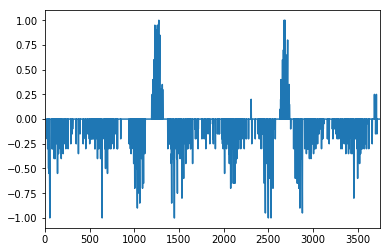

In [33]:
df["steering_angle"].plot()

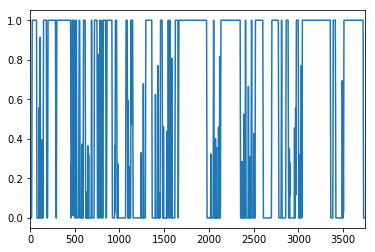

In [13]:
df["throttle"].plot()

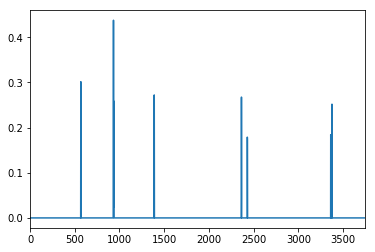

In [14]:
df["break"].plot()

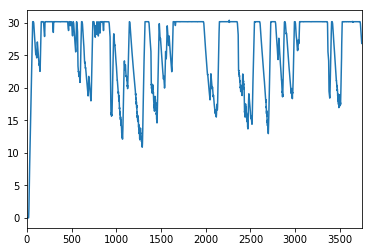

In [15]:
df["speed"].plot()

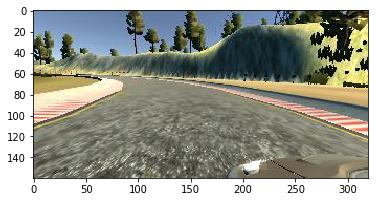

In [17]:
img = Image.open(df["left"][0])
plt.imshow(img)

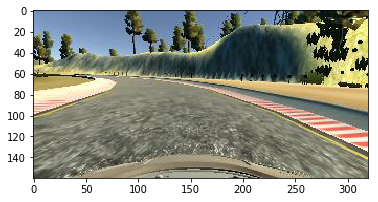

In [19]:
img = Image.open(df["center"][0])
plt.imshow(img)

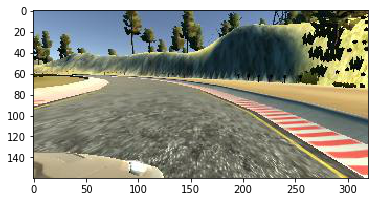

In [22]:
img = Image.open(df["right"][0])
plt.imshow(img)

In [24]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [26]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def processImage(img):
    return img[10:130:2, ::4, :]

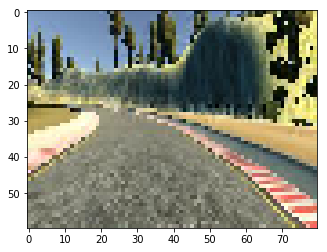

In [28]:
img = processImage(loadImage(df["center"][0]))
plt.imshow(img)

In [37]:
X = [processImage(loadImage(fname)) for fname in df["center"]]
X += [processImage(loadImage(fname)) for fname in df["left"]]
X += [processImage(loadImage(fname)) for fname in df["right"]]

y = np.array(df["steering_angle"])
y = np.concatenate([y, y+0.4, y-0.4])
# +/- 0.4 for left/right view

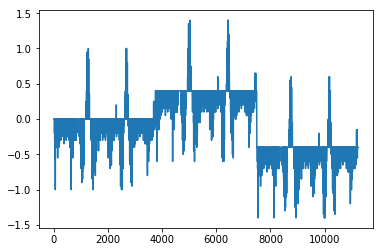

In [39]:
plt.plot(y)
plt.show();

In [38]:
X = np.array(X)
print(X.shape)
print(y.shape)

(11238, 60, 80, 3)
(11238,)


In [40]:
np.save("X.np", X)
np.save("y.np", y)